In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data
from tensorflow.keras.datasets import fashion_mnist

(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train_set.shape, y_train_set.shape, x_test.shape, y_test. shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

9


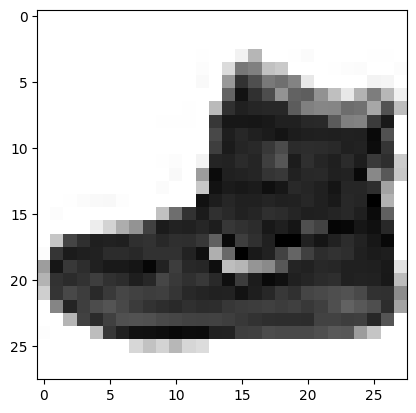

In [4]:
i = 0
print(y_train_set [i])
plt.imshow(x_train_set[i], cmap='binary')
plt.show()

In [5]:
# Split data
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_set,
                                                      y_train_set,
                                                      random_state=1)


In [ ]:
print(x_train[0])
x_train2 = x_train / 255.0
print(x_train2[0])

In [6]:
# Preprocessing
x_train = x_train / 255.0
x_valid =x_valid / 255.0
x_test = x_test / 255.0
print(x_train.shape, x_valid.shape, x_test.shape)

(45000, 28, 28) (15000, 28, 28) (10000, 28, 28)


In [7]:
# Build Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [8]:
keras.backend.clear_session()
np. random. seed (1)
tf.random.set_seed(1)

In [11]:
model = Sequential([
    #第一層：將 28*28攤平成一維度
    Flatten(input_shape=x_train.shape[1:]),
    #第二層
    Dense (units=300, activation='relu'),
    Dense (units=200, activation='relu'),
    Dense (units=100, activation='relu'),
    #輸出層：10類別，10個神經元
    Dense (units=10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 200)               60200     
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 316810 (1.21 MB)
Trainable params: 316810 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile
model. compile(loss='sparse_categorical_crossentropy',
               optimizer='sgd',
               metrics= ['accuracy'])

In [14]:
# Train
train = model.fit(x_train, y_train,
                   epochs=20,
                  validation_data=(x_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.7982 - accuracy: 0.7307 - val_loss: 0.6586 - val_accuracy: 0.7733
Epoch 2/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5073 - accuracy: 0.8237 - val_loss: 0.5234 - val_accuracy: 0.8161
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4517 - accuracy: 0.8412 - val_loss: 0.4581 - val_accuracy: 0.8367
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4197 - accuracy: 0.8526 - val_loss: 0.4269 - val_accuracy: 0.8478
Epoch 5/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3981 - accuracy: 0.8606 - val_loss: 0.9652 - val_accuracy: 0.6768
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3806 - accuracy: 0.8670 - val_loss: 0.5754 - val_accuracy: 0.8091
Epoch 7/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3636 - accuracy: 0.8706 - val_loss: 0.3939 - val_accuracy:

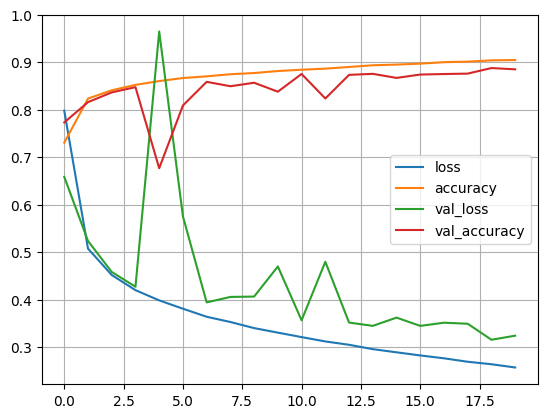

In [15]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt. show()

In [16]:
# Evaluate
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.8744


[0.35544511675834656, 0.8744000196456909]

In [19]:
# Predict
y_proba = model.predict(x_test)
y_proba[10:13].round (2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.03, 0.  , 0.96, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.36, 0.  , 0.61, 0.03, 0.  ]],
      dtype=float32)

In [20]:
y_pred = np.argmax(y_proba, axis=1)
y_pred[10:13]# 預測結果

array([4, 5, 7])

In [21]:
y_test[10:13]

array([4, 5, 7], dtype=uint8)

In [22]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[790   1  12  53   6   0 120   0  18   0]
 [  1 966   1  25   3   0   3   0   1   0]
 [ 11   0 767  19  95   0 102   0   6   0]
 [ 14   7  10 927  15   0  20   0   7   0]
 [  1   1  89  52 786   0  65   0   6   0]
 [  1   0   0   1   0 939   0  44   4  11]
 [102   1  73  37  67   0 698   0  22   0]
 [  0   0   0   0   0   9   0 984   0   7]
 [  1   1   2   9   7   1   3   4 972   0]
 [  0   0   0   0   0  11   1  73   0 915]]
